In [38]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# k-means clustering

### 데이터 준비
* 테스트 데이터 생성
    * make_blobs()

In [39]:
# 2개의 군집을 가지는 테스트 데이터 생성
from sklearn.datasets import make_blobs
features, targets = make_blobs(n_samples=200, 
                    n_features=2,
                    centers=3,
                    cluster_std=0.8,
                    random_state=0)

print(features.shape, targets.shape)

(200, 2) (200,)


In [40]:
# 생성된 테스트데이터로 DataFrame 만들기
cluster_df = pd.DataFrame(features, columns=['feature1','feature2'])
cluster_df['target'] = targets
cluster_df.head(3)

,feature1,feature2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


In [41]:
# target 데이터의 빈도수
cluster_df['target'].value_counts()

target
0    67
1    67
2    66
Name: count, dtype: int64

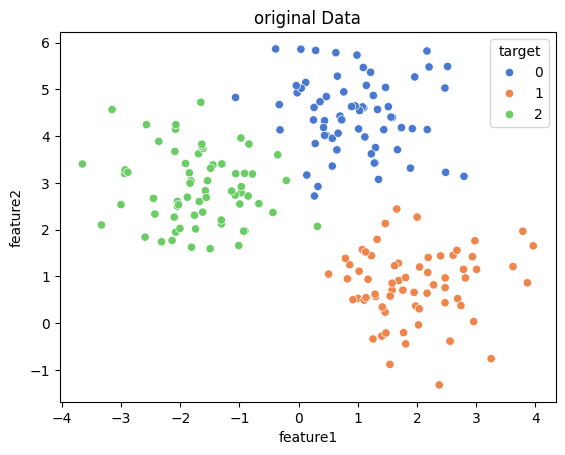

In [42]:
# 데이터 시각화
sns.scatterplot(data=cluster_df, x='feature1', y='feature2', hue='target', palette='muted')
plt.title('original Data')
plt.show()

### 군집화

In [43]:
# 클러스터링 객체 생성
from sklearn.cluster import KMeans
km= KMeans(n_clusters=3)

# 학습 및 클러스터링 결과 예측
# km.fit(features)
# kmeans_cluster = km.predict(features)
kmeans_cluster = km.fit_predict(features)

print(kmeans_cluster)

[0 2 2 0 2 0 1 1 2 0 2 0 2 2 2 0 1 1 2 0 0 1 2 2 0 2 1 0 0 0 2 2 0 2 1 1 2
 1 1 0 1 0 0 0 2 2 2 0 2 2 2 1 0 0 0 0 1 1 2 2 0 0 2 1 1 0 1 1 0 1 1 2 2 0
 2 0 1 1 1 0 0 2 2 1 1 2 2 0 2 1 0 0 1 2 1 2 2 0 0 1 1 2 0 2 0 2 1 2 2 1 2
 0 1 2 2 2 2 1 0 0 1 1 0 2 1 2 0 1 0 2 0 1 1 1 2 1 1 2 1 0 0 0 2 1 1 2 0 0
 1 2 1 0 0 0 2 1 1 1 2 2 1 0 0 0 2 2 1 0 1 1 2 1 2 1 0 0 2 0 2 1 2 0 1 1 1
 2 0 1 2 2 0 0 1 1 1 1 0 1 2 1]


In [44]:
# 데이터프레임에 군집과 결과인 kmeans_cluster 컬럼 추가
cluster_df['kmeans_cluster'] = kmeans_cluster
cluster_df.head(3)

,feature1,feature2,target,kmeans_cluster
0,-1.692427,3.622025,2,0
1,0.697940,4.428867,0,2
2,1.100228,4.606317,0,2


In [45]:
# 클러스터의 중심
km.cluster_centers_

array([[-1.73750494,  2.88741377],
       [ 1.95763312,  0.81041752],
       [ 0.94010346,  4.43980147]])

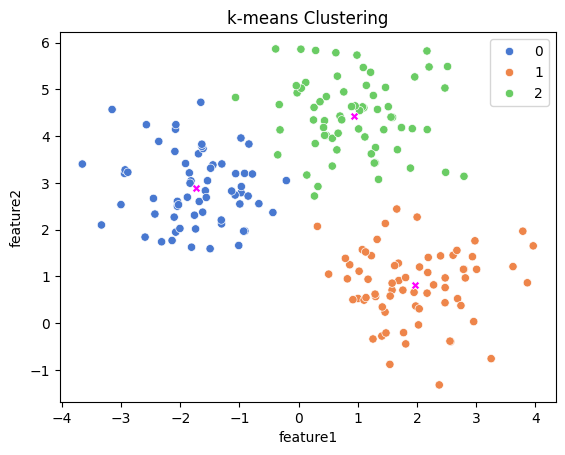

In [46]:
# 군집화 결과 시각화
sns.scatterplot(data=cluster_df, 
                x='feature1', 
                y='feature2', 
                hue='kmeans_cluster', 
                palette='muted')

# 개별 군집의 중심 좌표
sns.scatterplot(x=km.cluster_centers_[:,0], 
                y=km.cluster_centers_[:,1], 
                color='magenta',
                marker='X')

plt.title('k-means Clustering')
plt.show()

### elbow 방법

In [47]:
inertia = []
for n in range(2,7):
    km = KMeans(n_clusters=n)
    km.fit(features)
    print(km.inertia_)
    inertia.append(km.inertia_)

548.0904569461312
240.0078759459446
207.97265795818788
182.64167004506183
161.15113222397093


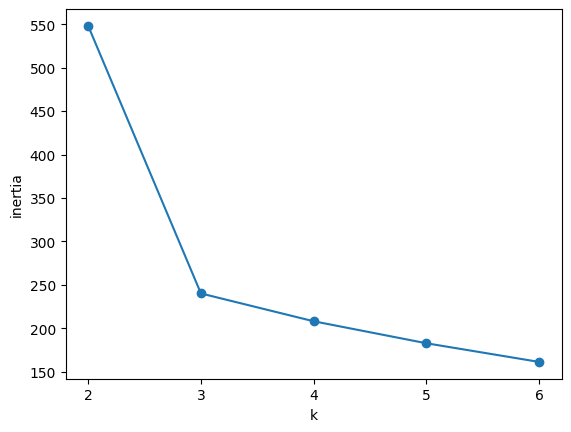

In [48]:
plt.plot(range(2,7), inertia, marker='o')
plt.xticks(range(2,7))
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

### 실루엣 분석

In [49]:
# 개별 실루엣 계수
from sklearn.metrics import silhouette_samples
cluster_df['silhouette'] = silhouette_samples(features, kmeans_cluster)
cluster_df.head()

,feature1,feature2,target,kmeans_cluster,silhouette
0,-1.692427,3.622025,2,0,0.593545
1,0.697940,4.428867,0,2,0.658156
2,1.100228,4.606317,0,2,0.700114
3,-1.448724,3.384245,2,0,0.605494
4,1.214861,5.364896,0,2,0.654450


In [50]:
# 다른 군집에 클러스터가 할당된 데이터가 있는지 확인
cond = cluster_df['silhouette'] < 0
cluster_df.loc[cond]

,feature1,feature2,target,kmeans_cluster,silhouette
108,-1.066122,4.826682,0,2,-0.013518
113,-0.353641,3.599924,2,2,-0.024687


In [51]:
# 평균 실루엣 계수
from sklearn.metrics import silhouette_score
silhouette_score(features, kmeans_cluster)

np.float64(0.5761118248795379)

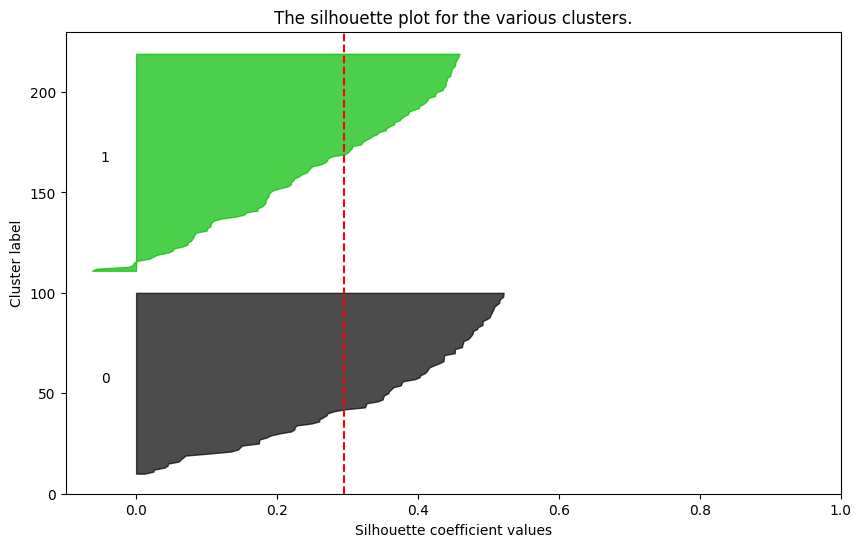

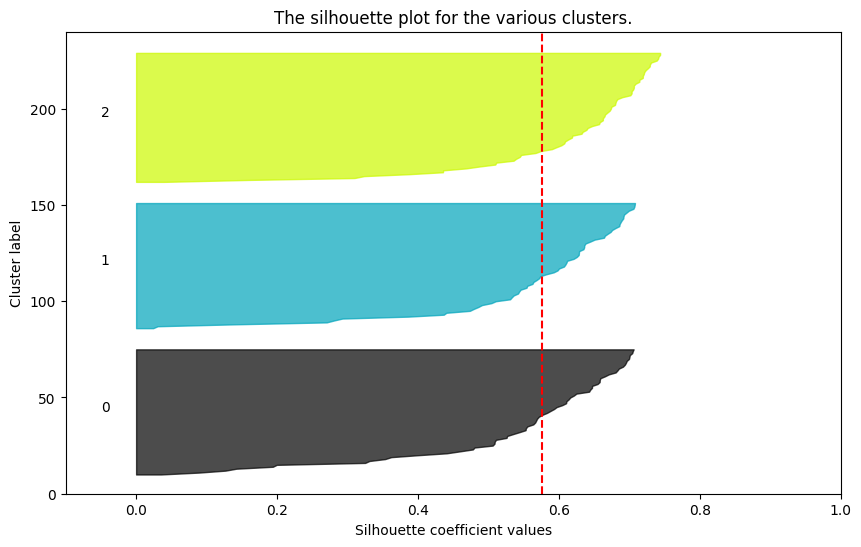

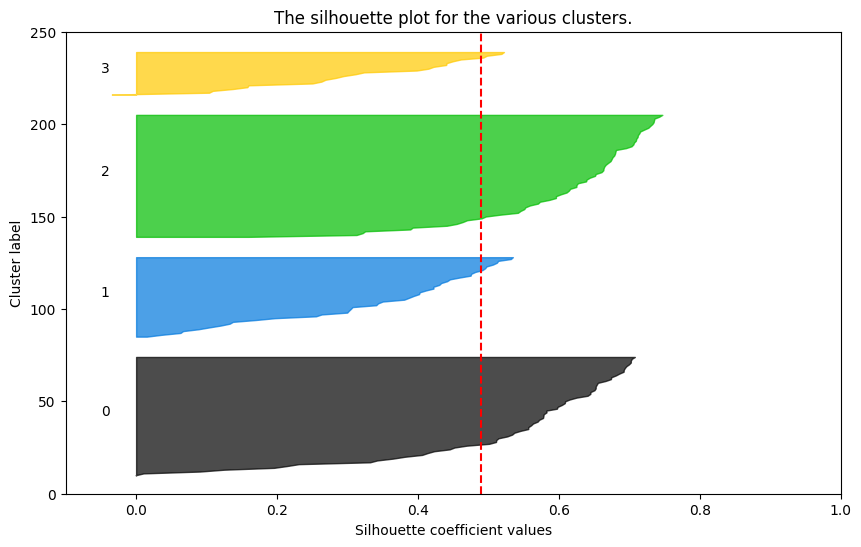

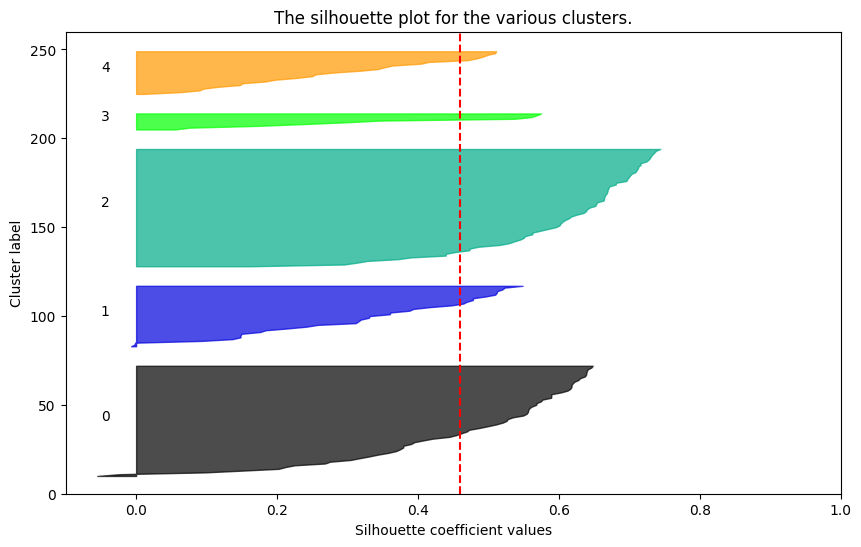

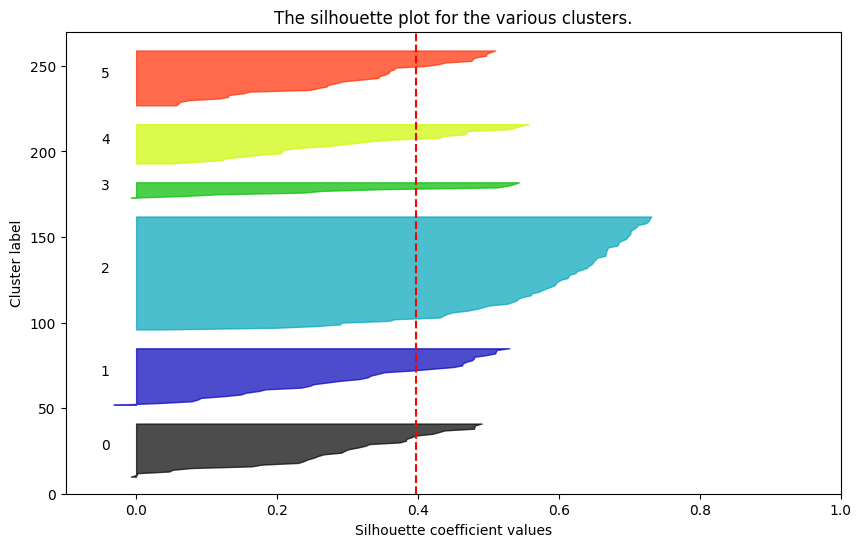

In [52]:
# 최적의 실루엣 찾기
import silhouette_analysis as s
for k in range(2,7):
    s.silhouette_plot(features, k)

# DBSCAN

### 데이터 준비

In [53]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000,
                    shuffle=True,
                    noise=0.05,
                    random_state=0,
                    factor=0.5)

df = pd.DataFrame(X, columns=['feature1', 'feature2'])
df['target'] = y

df.head()

,feature1,feature2,target
0,0.519781,-0.015981,1
1,-0.057719,-0.420279,1
2,-0.805155,-0.662227,0
3,0.316549,0.312730,1
4,-0.304804,0.407563,1


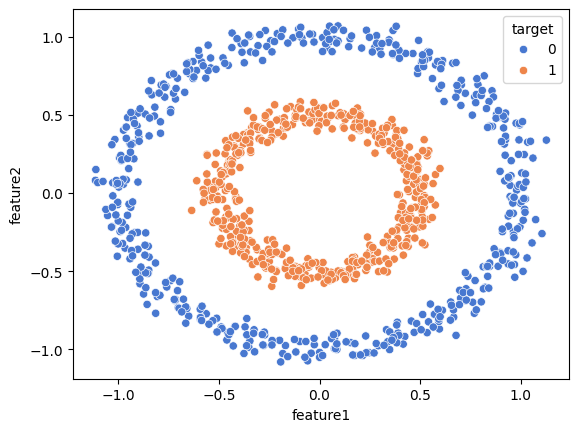

In [54]:
sns.scatterplot(data=df, x='feature1', y='feature2', hue='target', palette='muted')
plt.show()

### k-means clustergin

In [55]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2)
df['kmeans'] = km.fit_predict(X)

df.head()

,feature1,feature2,target,kmeans
0,0.519781,-0.015981,1,0
1,-0.057719,-0.420279,1,1
2,-0.805155,-0.662227,0,1
3,0.316549,0.312730,1,0
4,-0.304804,0.407563,1,1


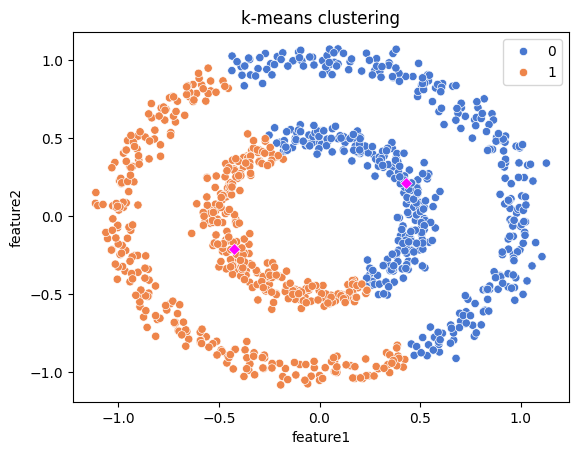

In [56]:
sns.scatterplot(df, x='feature1', y='feature2', hue='kmeans', palette='muted')
sns.scatterplot(x=km.cluster_centers_[:,0], y=km.cluster_centers_[:,1], 
                marker='D', color='magenta')
plt.title('k-means clustering')
plt.show()

### DBSCAN

In [57]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.2,
                min_samples=10)
df['dbscan'] = dbscan.fit_predict(X)
df.head()

,feature1,feature2,target,kmeans,dbscan
0,0.519781,-0.015981,1,0,0
1,-0.057719,-0.420279,1,1,0
2,-0.805155,-0.662227,0,1,1
3,0.316549,0.312730,1,0,0
4,-0.304804,0.407563,1,1,0


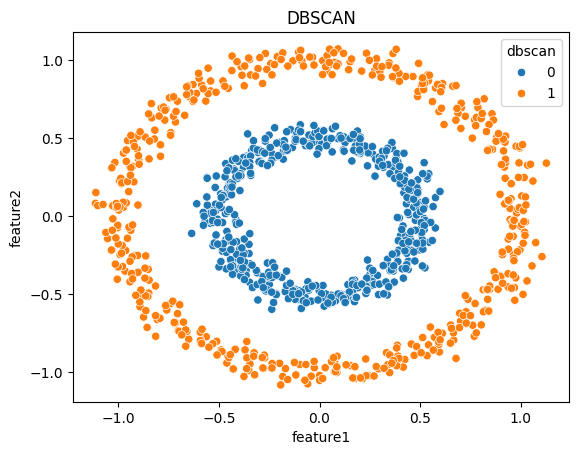

In [59]:
sns.scatterplot(df, x='feature1', y='feature2', hue='dbscan')
plt.title('DBSCAN')
plt.show()